In [1]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
uploaded=files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [3]:
data=pd.read_csv('credit_risk_dataset.csv')

In [4]:
duplicate_rows = data[data.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
       person_age  person_income person_home_ownership  person_emp_length  \
15975          23          42000                  RENT                5.0   
15989          23          90000              MORTGAGE                7.0   
15995          24          48000              MORTGAGE                4.0   
16025          24          10000                  RENT                8.0   
16028          23         100000              MORTGAGE                7.0   
...           ...            ...                   ...                ...   
32010          42          39996              MORTGAGE                2.0   
32047          36         250000                  RENT                2.0   
32172          49         120000              MORTGAGE               12.0   
32259          39          40000                   OWN                4.0   
32279          43          11340                  RENT                4.0   

             loan_intent loan_grade  loan_amnt  loan_int_ra

In [5]:
data.dropna(axis=0, inplace=True)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
duplicate_rows = data[data.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [person_age, person_income, person_home_ownership, person_emp_length, loan_intent, loan_grade, loan_amnt, loan_int_rate, loan_status, loan_percent_income, cb_person_default_on_file, cb_person_cred_hist_length]
Index: []


In [8]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Ranking of Loan Intents by Default Count:
         Loan Intent  Default Count  Average Loan Amount
3            MEDICAL           1418         11373.748237
0  DEBTCONSOLIDATION           1294         11316.750386
1          EDUCATION            967         11160.082730
4           PERSONAL            961         10708.896982
2    HOMEIMPROVEMENT            820          9966.067073
5            VENTURE            728         11304.910714

Ranking of Loan Intents by Average Loan Amount:
         Loan Intent  Default Count  Average Loan Amount
3            MEDICAL           1418         11373.748237
0  DEBTCONSOLIDATION           1294         11316.750386
5            VENTURE            728         11304.910714
1          EDUCATION            967         11160.082730
4           PERSONAL            961         10708.896982
2    HOMEIMPROVEMENT            820          9966.067073


<ipython-input-9-1dd856864a32>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Default Count", y="Loan Intent", data=loan_intent_default_summary, palette="viridis", ax=ax1)


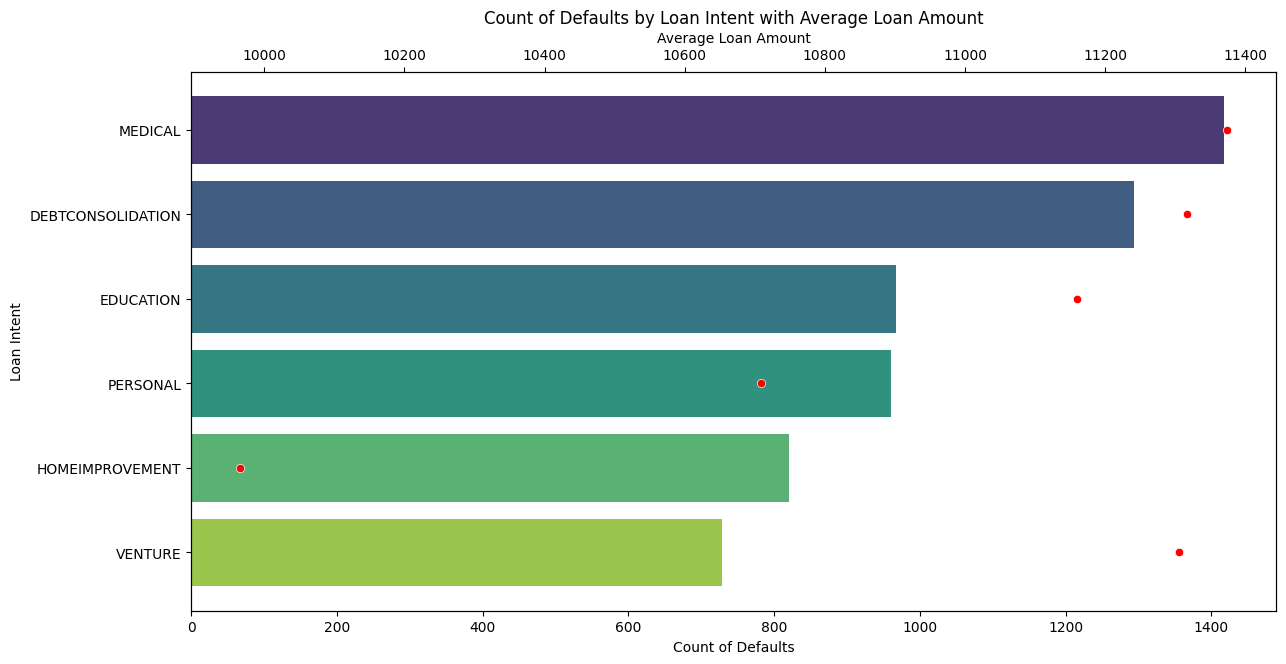

In [9]:
default_cases = data[data["loan_status"]==1]
loan_intent_default_count = default_cases.groupby("loan_intent")["loan_status"].count().reset_index()
loan_intent_default_count.columns = ["Loan Intent", "Default Count"]
loan_intent_avg_loan_amount = default_cases.groupby("loan_intent")["loan_amnt"].mean().reset_index()
loan_intent_avg_loan_amount.columns = ["Loan Intent", "Average Loan Amount"]
loan_intent_default_summary = pd.merge(loan_intent_default_count, loan_intent_avg_loan_amount, on="Loan Intent")
loan_intent_default_summary = loan_intent_default_summary.sort_values(by='Default Count', ascending=False)
defaultcount = loan_intent_default_summary.sort_values(by="Default Count", ascending=False)
print("Ranking of Loan Intents by Default Count:")
print(defaultcount)
avgloanamount = loan_intent_default_summary.sort_values(by="Average Loan Amount", ascending=False)
print("\nRanking of Loan Intents by Average Loan Amount:")
print(avgloanamount)
fig, ax1 = plt.subplots(figsize=(14,7))
sns.barplot(x="Default Count", y="Loan Intent", data=loan_intent_default_summary, palette="viridis", ax=ax1)
ax1.set_title("Count of Defaults by Loan Intent with Average Loan Amount")
ax1.set_xlabel("Count of Defaults")
ax1.set_ylabel("Loan Intent")
ax2 = ax1.twiny()
sns.scatterplot(x="Average Loan Amount", y="Loan Intent", data=loan_intent_default_summary, color="red", ax=ax2)
ax2.set_xlabel("Average Loan Amount")
plt.show()